## PLA(Percetron Learning Algorithm)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
X1=np.random.normal(5,1,(2,20))
y1=-np.ones(20)
s1=np.vstack([X1,y1])
X2=np.random.normal(0,1,(2,20))
y2=np.ones(20)
s2=np.vstack([X2,y2])
s=np.hstack([s1,s2])

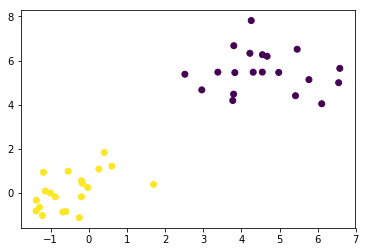

In [23]:
plt.scatter(s[0,:],s[1,:],c=s[2,:])
plt.show()

[1. 1. 1.]
[1.         4.2581242  7.81199294]
[ 4.2581242   7.81199294 -1.        ]
13.070117140776102


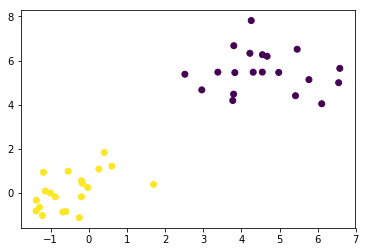

[ 0.         -3.2581242  -6.81199294]
[ 1.         -0.19128839  0.55587649]
[-0.19128839  0.55587649  1.        ]
-3.163385395653493


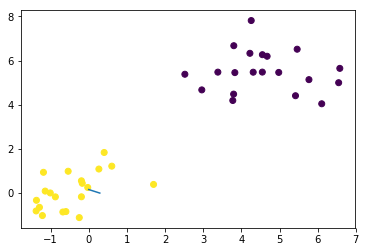

[ 1.         -3.44941259 -6.25611645]
[1.         0.40482732 1.83791376]
[0.40482732 1.83791376 1.        ]
-11.894618955409873


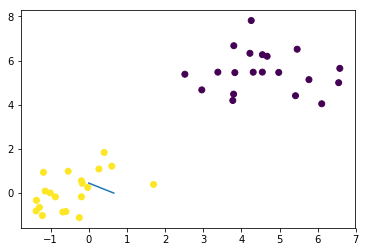

[ 2.         -3.04458528 -4.41820269]
[1.         0.60427574 1.21892908]
[0.60427574 1.21892908 1.        ]
-5.225244741157491


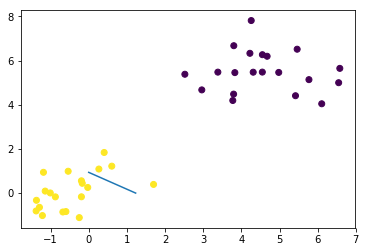

[ 3.         -2.44030954 -3.19927361]
[1.         1.69880428 0.39147721]
[1.69880428 0.39147721 1.        ]
-2.3980510097038588


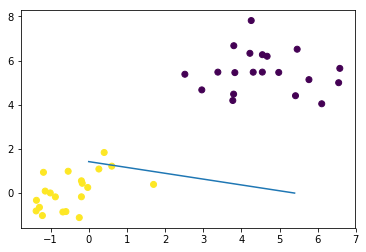

[ 4.         -0.74150526 -2.8077964 ]
[1.         0.40482732 1.83791376]
[0.40482732 1.83791376 1.        ]
-1.4606692234237553


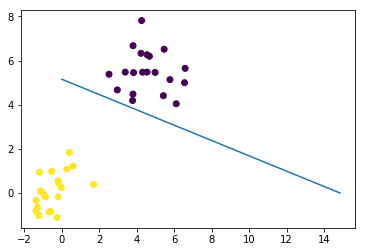

In [42]:
l=np.ones(3)
while True:
    all_done=True
    for i in range(s.shape[1]):
        tmp=np.hstack([np.array([1]),s[:2,i]])
        if np.dot(tmp,l)*s[2,i]<0:
            print l
            print tmp
            print s[:,i]
            print np.dot(tmp,l)
            l+=s[2,i]*tmp
            plt.scatter(s[0,:],s[1,:],c=s[2,:])
            plt.plot([0,(-l[0]/l[1])],[-l[0]/l[2],0])
            plt.show()
            all_done=False
    if all_done:
        break
    
            
        

In [27]:
tmp

array([1.        , 4.2581242 , 7.81199294])

In [30]:
tmp*l

array([1.        , 4.2581242 , 7.81199294])

In [4]:
df=pd.read_csv('data/hw1_15_train.dat.txt',header=None,sep='\s+')
df.head(5)

,0,1,2,3,4
0,0.97681,0.107230,0.64385,0.29556,1
1,0.67194,0.241800,0.83075,0.42741,1
2,0.20619,0.233210,0.81004,0.98691,1
3,0.51583,0.055814,0.92274,0.75797,1
4,0.70893,0.108360,0.33951,0.77058,1


In [5]:
df[5]=1
df.head(5)

,0,1,2,3,4,5
0,0.97681,0.107230,0.64385,0.29556,1,1
1,0.67194,0.241800,0.83075,0.42741,1,1
2,0.20619,0.233210,0.81004,0.98691,1,1
3,0.51583,0.055814,0.92274,0.75797,1,1
4,0.70893,0.108360,0.33951,0.77058,1,1


In [8]:
df1=df[[5,0,1,2,3,4]]
df1.head(5)

,5,0,1,2,3,4
0,1,0.97681,0.107230,0.64385,0.29556,1
1,1,0.67194,0.241800,0.83075,0.42741,1
2,1,0.20619,0.233210,0.81004,0.98691,1
3,1,0.51583,0.055814,0.92274,0.75797,1
4,1,0.70893,0.108360,0.33951,0.77058,1


In [47]:
w=np.zeros(5)
X=df1.iloc[:,0:5].values
y=df1.iloc[:,5].values
update=False
index = 0
while True:
#     index_array=np.random.permutation(df1.shape[0])
#     for i in index_array:
    for i in range(df1.shape[0]):
        sig= 1 if np.dot(w,X[i])>0 else -1
        if sig*y[i]<0:
            update=True
            index+=1
            w+=y[i]*X[i]
    if not update:
        break
    update=False
print index
print w

45
[-3.         3.0841436 -1.583081   2.391305   4.5287635]


In [49]:
count=0
for time in range(2000):
    np.random.seed(time)
    index_array=np.random.permutation(df1.shape[0])
    w=np.zeros(5)
    index = 0
    X=df1.iloc[:,0:5].values
    y=df1.iloc[:,5].values
    update=False

    while True:
        for i in range(df1.shape[0]):
            sig= 1 if np.dot(w,X[i])>0 else -1
            if sig*y[i]<0:
                update=True
                w+=0.5*y[i]*X[i]
                index+=1
        if not update:
            break
        update=False
    count+=index
print count/2000.0
print w

45.0
[-1.5         1.5420718  -0.7915405   1.1956525   2.26438175]


[1.57747  0.50709  0.147443 0.81202  0.      ]
